[3.26557774 2.09011382 3.4084095  0.2903989  0.02061383 0.91373526
 3.23401718 0.60578446 2.46449095 4.33234917 0.11192245 4.05128947
 1.9310671  4.46697547 1.30567409 0.21340975 5.58953448 4.22039123
 1.05627574 4.22429909 5.06209679 2.66696417 3.61895012 5.89858204
 4.00202664 3.07915897 4.17484102 0.74640336 0.79443066 5.29975175
 4.51505546 0.41417162 1.44826787 2.1545022  2.78500518 5.70715355
 6.18509488 0.14698519 0.23905118 3.28287427 1.84826697 5.46151663
 0.41237573 4.56860402 3.53196846 0.76138792 2.90516373 3.45708342
 2.72708337 3.4488604  0.17455369 4.62527471 0.28165407 0.7180054
 5.36571969 3.26391488 5.97070946 5.82177266 6.23286833 5.7678379
 1.72479523 2.81809861 3.54392718 1.79485217 3.15975451 0.31894089
 1.43731691 1.61663428 4.58880569 2.89797422 6.27890478 3.61203361
 4.65636713 0.44264018 6.21391625 1.31963315 3.33066153 4.93477868
 3.87254921 3.10309439 2.22356471 5.82675368 0.32254086 0.25621637
 1.12795613 0.90411257 2.1445211  5.41528172 1.06772185 1.120716

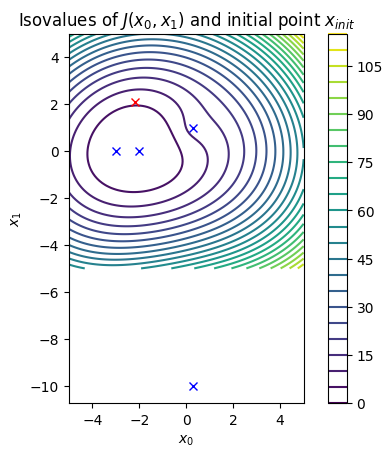

[-0.18418851  3.30660033]


In [5]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib inline

x0 = np.array([-2.2,2.1])

mult = 1

m1 = 0.1
m2 = 0.9
Tol = 5e-16
Maxiter = 2000

variant = 1
# parameters for variant 1: cellphones

xsol = -2
ysol = 0
thetas = 2*np.pi*np.random.random_sample((100,))
radii = 0.3+np.random.random_sample((100,))
print(thetas)

xs        = np.array([0.3,0.3,-3])
#xs        = xsol+ radii*np.array(np.cos(thetas))
ys        = np.array([1,-10,0])
#ys        = ysol+ radii*np.array(np.sin(thetas))


dist      = np.sqrt((xs-xsol)**2+(ys-ysol)**2)



def r(x):
    if variant==1:
        return np.array([
            dist[i]-np.sqrt((x[0]-xs[i])**2+(x[1]-ys[i])**2) for i in [0,1,2]
        ])

def Jac(x):
    if variant==1:
        return np.array([
            -1*np.array([x[0]-xs[i],x[1]-ys[i]])/np.sqrt((x[0]-xs[i])**2+(x[1]-ys[i])**2) for i in [0,1,2]
        ])

print(Jac(x0))    
    
def J(x):
    if variant==1: 
        res = r(x);
        return sum(res**2)
        
        
def GradJ(x):
    if variant==1:
        res = r(x)
        Jr  = Jac(x)
        return Jr.T@res
    
    
def GNdir(x):
    if variant==1:
        res = r(x)
        Jr  = Jac(x)
        Mat = Jr.T@Jr
        try:
            d = -np.linalg.solve(Mat,Jr.T@res)
            return d
        except:
            print("could not invert GN matrix")
            return Jr.T@res

if variant==1:
    analytic = [xsol,ysol]
if variant==2:
    analytic = [0,0]
if variant==3:
    analytic = [0,0]
print("Initial value:",J(x0))

plt.figure()
xmin=min(-4,analytic[0])-1
xmax=max(4,analytic[0])+1
ymin=min(-4,analytic[1])-1
ymax=max(4,analytic[1])+1
aX0=np.linspace(xmin,xmax,100)
aX1=np.linspace(ymin,ymax,100)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,25)#(np.linspace(0,30,10)**2))
plt.plot(x0[0],x0[1],'rx')
plt.plot(xsol,ysol,'bx')

plt.plot(xs,ys,'bx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.show()

print(GradJ(x0))

In [6]:
def GDlinesearch(f,df,x0,tol,maxiter,m1,m2,GN=1):
    phist = []
    vhist = []
    ghist = []
    phist.append(x0)            # Create an array which holds the optimization history
 
    val = f(x0)
    gd   = df(x0)
    vhist.append(val)
    ghist.append(gd)
    iter = 0
    step = 0.1
    prevval = val
    d = gd
    while abs(np.linalg.norm(gd))>=Tol: 
        iter=iter+1
        #Line search
        tl=0
        tr=0
        t=1
        step=t
        # choice of the descent direction  
        if GN==1:
            d = GNdir(x0)
        else:
            d = -gd
    

        #np.sqrt(abs((f(x0+step*d,v)-val)))/step<np.sqrt(abs(-(m1*(d*d))))
        while (1==1):
            qt = f(x0+t*d)
            qp = np.dot(gd,d)
            #print(tl," ",tr)
            if ((qt-val)/t<=(m1*qp)) and ((qt-val)/t>=(m2*qp)):
                step=t   # we found a good step
                break
            if ((qt-val)/t>(m1*qp)):
                # step too big
                tr = t
            if ((qt-val)/t<(m2*qp)):
                # step too small
                tl = t
            if(tr==0):
                t = 2*tl
            else:
                t = 0.5*(tl+tr)
            if abs(tr-tl)<1e-15*tr or tr<1e-15:
                break
        if(np.linalg.norm(step*d)/np.linalg.norm(x0)<Tol):
            print("Too small change!")
            #d = -gd
            #step = 0.1
            break
        x0 = x0+step*(d)
        val = f(x0)
        gd   = df(x0)
        
        if(iter%10==0):
            print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(np.linalg.norm(gd)))
        phist.append(x0)
        vhist.append(val)
        ghist.append(d)
        if(iter>maxiter):
            print('Maximum number of iterations reached!')
            break
        #if(abs(val-prevval)<Tol):
            #print('Function does not decrease enough!')
            #break
        prevval = val
    if(np.linalg.norm(d)<Tol): 
        print('Algorithm converged!')
    print('')
    print('Final output:')
    print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(np.linalg.norm(gd)))
    return phist,vhist,ghist

In [9]:
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2,GN=0)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Difference to analytical sol: ',np.linalg.norm(analytic-pp[-1]))



Iter:  10 | Val:  1.6408100296080603e-06 | Step:  0.75  Grad:  0.0017740110825063065
Iter:  20 | Val:  1.1350626532216391e-13 | Step:  0.75  Grad:  4.665934354842057e-07
Iter:  30 | Val:  7.852093649825844e-21 | Step:  0.75  Grad:  1.2272172245423444e-10
Iter:  40 | Val:  5.5476643159667655e-28 | Step:  0.75  Grad:  3.260897505365303e-14
Too small change!

Final output:
Iter:  46 | Val:  3.944304526105059e-31 | Step:  1  Grad:  8.695693244210098e-16
Number of iterations:  46
Final position:  [-2.00000000e+00 -9.93701376e-16]
Difference to analytical sol:  1.0884197949710668e-15


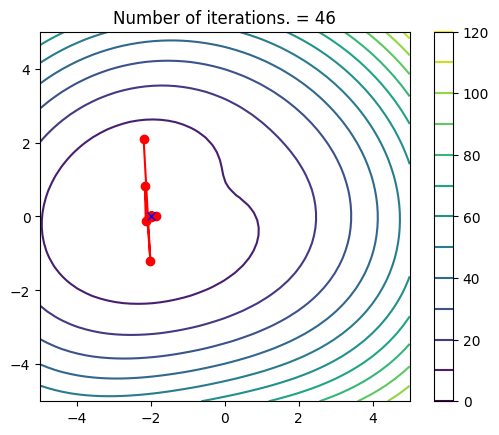

In [10]:
plt.figure(dpi=100)
#print(vv)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")

plt.plot(analytic[0],analytic[1],'-bx')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()

<IPython.core.display.Javascript object>


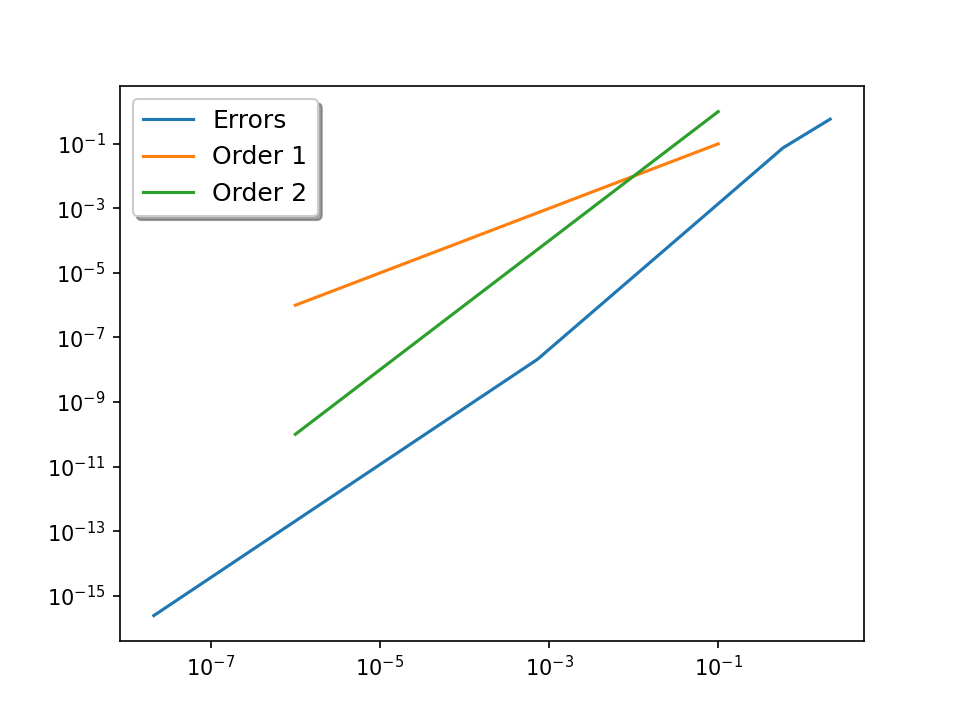

In [10]:
Niter = len(pp)
dis = np.linspace(1,Niter,Niter+1)

errors=[np.sqrt((X[0]-analytic[0])**2+(X[1]-analytic[1])**2) for X in pp]
#print(errors)

if(dis.size>10):
    dis2 = dis[0:10]
else:
    dis2 = dis
sq  = 0.1**dis2
lam = 0.5*(1+np.sqrt(5))
sq2 = 100*sq**2
sq3 = 100*sq**3
sqlam = 100*sq**lam

plt.figure()
#fig, ax = plt.subplots()

plt.loglog(errors[:-1:],errors[1:],label='Errors')
plt.loglog(sq,sq,label='Order 1')

plt.loglog(sq,sq2,label='Order 2')
#plt.loglog(sq,sq3,label='Order 3')

plt.legend(loc='best', shadow=True, fontsize='large')
plt.show()